In [23]:
# import requests as req
import pandas as pd
# from nsepy import get_history
from datetime import date
import formulas2
import numpy as np

In [6]:
apv_api_key = '2N8UEPVRC2AWTK6B'
apv_base_url = 'https://www.alphavantage.co'
size = 'compact'
ticker = 'NSE:TCS'

time_series_daily = req.get(apv_base_url + '/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=' + ticker + '&outputsize=' + size + '&apikey=' + apv_api_key)


dataframe = pd.DataFrame(time_series_daily)

# print(time_series_daily)

<AxesSubplot:xlabel='Date'>

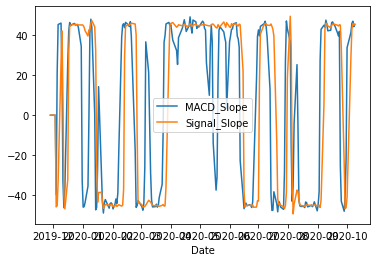

In [52]:
ticker = formulas2.Ticker("TCS", date(2019,10,10), date(2020,10,10))

data = ticker.get_historical_data()
data_copy = data.copy()

indicator = formulas2.Indicator(data)

macd_data = indicator.MACD()
macd_slope = indicator.slope(macd_data["MACD"])
signal_slope = indicator.slope(macd_data["Signal"])



final_data = macd_data.copy()

# print(final_data)

final_data["MACD_Slope"] = macd_slope
final_data["Signal_Slope"] = signal_slope

final_data[["MACD_Slope", "Signal_Slope"]].plot()

# macd_data[['MACD', 'Signal']].plot()

# data[['Close']].plot()

In [60]:
cash = 10000

test_data = final_data.copy()
test_data["Status"] = np.NaN
last_status = 'SELL'
latest_buy_value = 0

for i in range(len(test_data)):
    
    # print(test_data.iloc[i, 12])

    if (last_status == 'SELL'):
        if (test_data['MACD'][i] > test_data['Signal'][i] and test_data['MACD_Slope'][i] > test_data['Signal_Slope'][i]):
          
            # BUY
            if (cash >= test_data['Close'][i]):
     
                cash = cash - test_data['Close'][i] 
                test_data.iloc[i, 12] = 'BUY'
                latest_buy_value = test_data['Close'][i]
                last_status = 'BUY'

    if (last_status == 'BUY'):
        if (test_data['MACD'][i] < test_data['Signal'][i] and test_data['MACD_Slope'][i] < test_data['Signal_Slope'][i]):
            if (test_data['Close'][i] >= (latest_buy_value + latest_buy_value * 0.1)):
                cash = cash + test_data['Close'][i]
                test_data.iloc[i, 12] = 'SELL'
                last_status = 'SELL'

            # print(latest_buy_value)
            # print(test_data['Close'][j])

# print((latest_buy_value + latest_buy_value * 0.5))
print(cash)

    #     # SELL
    #     if (cash >= test_data['Close'][i]):
    #         cash = cash - test_data['Close'][i]
    #         test_data["Status"][i] = 'SELL'

    # print(final_data['MACD'][i])

7777.55
